In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=UserWarning, module="statsmodels")

In [100]:
path_data = '/kaggle/input/online-sales-dataset-popular-marketplace-data/Online Sales Data.csv'

In [101]:
df =  pd.read_csv(path_data)

In [102]:
df.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


In [103]:
def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['data type'])
    summ['#missing'] = df.isnull().sum().values 
    summ['%missing'] = df.isnull().sum().values / len(df)* 100
    summ['#unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['min'] = desc['min'].values
    summ['max'] = desc['max'].values
    summ['first value'] = df.loc[0].values
    summ['second value'] = df.loc[1].values
    summ['third value'] = df.loc[2].values
    
    return summ

In [104]:
summary(df)

data shape: (240, 9)


,data type,#missing,%missing,#unique,min,max,first value,second value,third value
Transaction ID,int64,0,0.0,240,10001.0,10240.0,10001,10002,10003
Date,object,0,0.0,240,NaN,NaN,2024-01-01,2024-01-02,2024-01-03
Product Category,object,0,0.0,6,NaN,NaN,Electronics,Home Appliances,Clothing
Product Name,object,0,0.0,232,NaN,NaN,iPhone 14 Pro,Dyson V11 Vacuum,Levi's 501 Jeans
Units Sold,int64,0,0.0,7,1.0,10.0,2,1,3
Unit Price,float64,0,0.0,117,6.5,3899.99,999.99,499.99,69.99
Total Revenue,float64,0,0.0,173,6.5,3899.99,1999.98,499.99,209.97
Region,object,0,0.0,3,NaN,NaN,North America,Europe,Asia
Payment Method,object,0,0.0,3,NaN,NaN,Credit Card,PayPal,Debit Card


In [105]:
unique_categories = df_aggregated_filtered['Product Category'].unique()
unique_categories

array(['Home Appliances', 'Books', 'Sports'], dtype=object)

In [106]:
print(df['Product Category'].value_counts())

Product Category
Electronics        40
Home Appliances    40
Clothing           40
Books              40
Beauty Products    40
Sports             40
Name: count, dtype: int64


In [107]:
duplicates = df.duplicated()
num_duplicates = duplicates.sum()

print(f'The number of duplicates: {num_duplicates}')

The number of duplicates: 0


To answer the first question, "Does Region affect Total Revenue?", we can use one-factor analysis of variance (One-Way ANOVA). This method will allow you to check whether there are significant differences in the average value of Total Revenue between different regions.

pvalue (>0,05)= Region does not affect Total Revenue. 

pvalue (<0,05)= Region affects Total Revenue. There is a significant difference in sales in different regions.

In [108]:
from scipy import stats

regions = df['Region'].unique()
region_data = [df[df['Region'] == region]['Total Revenue'] for region in regions]

anova_result = stats.f_oneway(*region_data)

print('ANOVA result:', anova_result)

ANOVA result: F_onewayResult(statistic=4.08458735708545, pvalue=0.01802909732103765)


The ANOVA results (F-value = 4.0846 and p-value = 0.0180) indicate that the differences in average total income between different regions are not random, but statistically significant at a significance level of 0.05. This allows us to conclude that the region affects the total income.

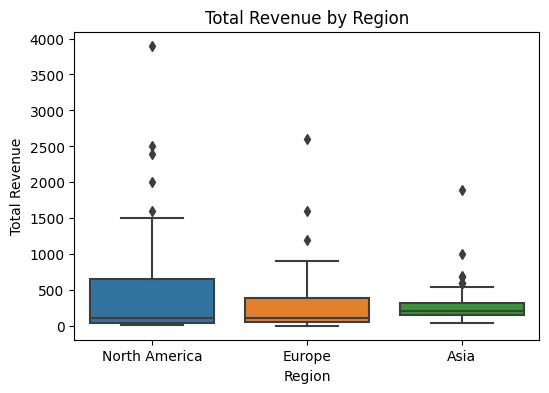

In [109]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Region', y='Total Revenue', data=df)
plt.title('Total Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.show()

In [110]:
import plotly.express as px

fig = px.line(df_aggregated_filtered, x='Date', y='Units Sold', color='Product Category',
              title='Sales by product category over time', markers=True)

fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Number of units sold')

fig.show()

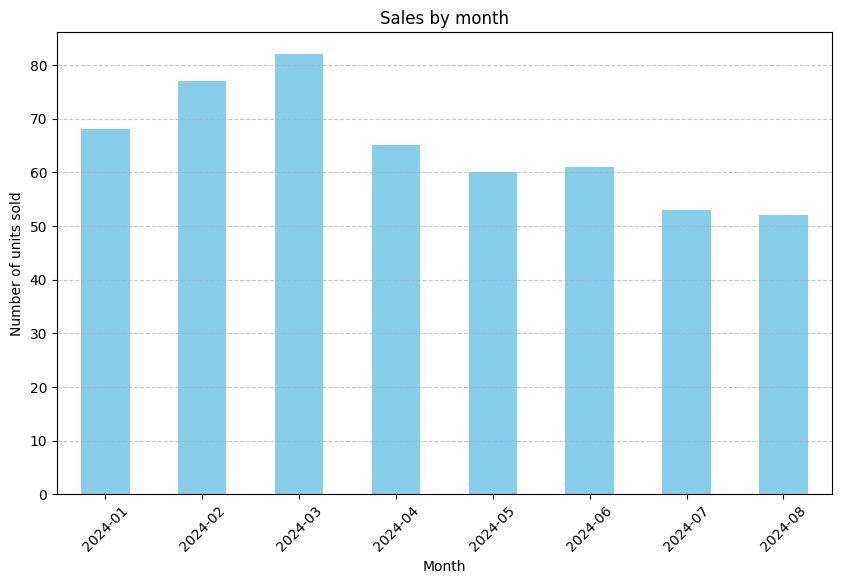

In [111]:
df['Date'] = pd.to_datetime(df['Date'])

monthly_sales = df.groupby(df['Date'].dt.to_period('M'))['Units Sold'].sum()

plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Sales by month')
plt.xlabel('Month')
plt.ylabel('Number of units sold')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Autocorrelation

Autocorrelation is a measure of the correlation between successive values in a time series. It shows how strongly the current value of the time series depends on previous values.

An autocorrelation value close to 1 indicates a strong positive correlation, that is, the current value is closely related to previous values and is moving in the same direction. A value close to -1 indicates a strong negative correlation, that is, the current value is moving in the opposite direction compared to previous values. A value near 0 means a slight correlation, that is, the current value is almost independent of previous values.

In [112]:
sales = df['Total Revenue']
autocorr_values = sales.autocorr()
print("Autocorrelation:", autocorr_values)

Autocorrelation: 0.16788536083948147


Autocorrelation is approximately 0.168, which indicates a weak positive correlation between the current revenue value and previous values. 

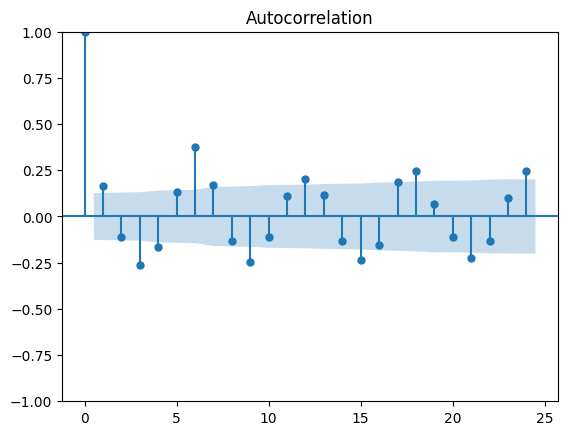

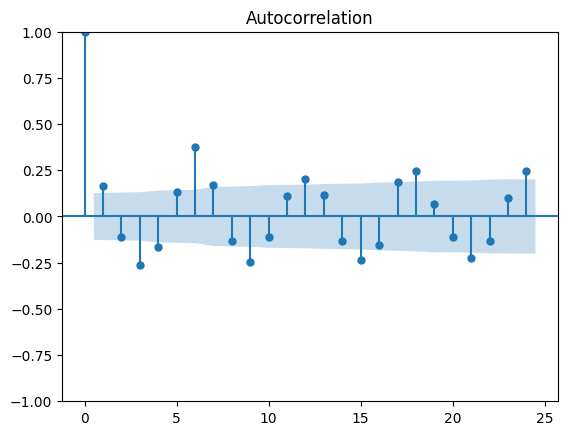

In [113]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['Total Revenue'])

## Preprocessing

Converting time series data to stationary data is an important step when working with the ARIMA model. Stationary time series data are characterized by a constant mean and variance over time, as well as the absence of systematic changes over time. The ARIMA model requires that the data be stationary or can be converted to stationary data. Let's apply differentiation.

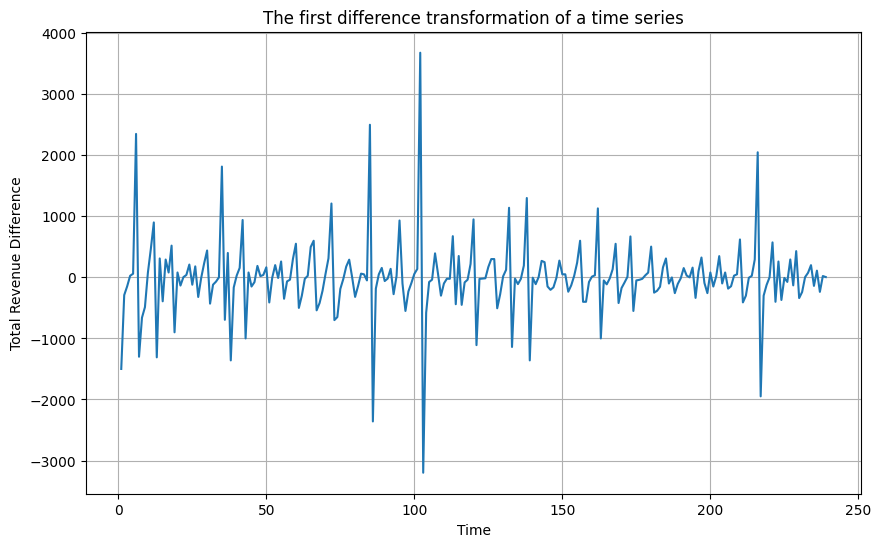

In [114]:
df['Total Revenue diff'] = df['Total Revenue'].diff()

df.dropna(inplace=True)

plt.figure(figsize=(10, 6))
plt.plot(df['Total Revenue diff'])
plt.title('The first difference transformation of a time series')
plt.xlabel('Time')
plt.ylabel('Total Revenue Difference')
plt.grid(True)
plt.show()

In [115]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Total Revenue diff'])

adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

print('Dickey-Fuller Test:')
print('ADF statistic:', adf_statistic)
print('p-value:', p_value)
print('Critical Values:')
for key, value in critical_values.items():
    print(f'   {key}: {value}')

if p_value < 0.05:
    print('p-value is less than the significance level (0.05). The time series is stationary.')
else:
    print('p-value is greater than or equal to the significance level (0.05). The time series is non-stationary.')

Dickey-Fuller Test:
ADF statistic: -6.336908964673348
p-value: 2.81600824814003e-08
Critical Values:
   1%: -3.460018927623594
   5%: -2.8745897386146817
   10%: -2.57372514086348
p-value is less than the significance level (0.05). The time series is stationary.


The ADF statistic is -6.37. This value is less than the critical values at the significance levels of 1%, 5% and 10%, which indicates the rejection of the null hypothesis (the hypothesis of the presence of a single root) in favor of the alternative hypothesis of stationarity.

The p-value is 2.30e-08, which is much less than the standard significance level of 0.05. This means that we reject the null hypothesis of the presence of a single root and accept the alternative hypothesis of the stationarity of the time series.

Therefore, based on the Dickey-Fuller test, it can be concluded that the Total Revenue diff time series is stationary. This means that we can use it to build an ARIMA model.

## ARIMA (Autoregressive Integrated Moving Average)

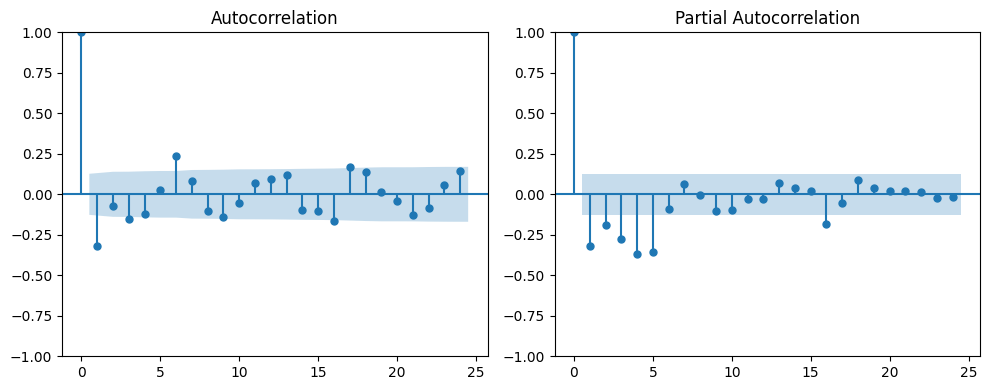

In [116]:
from statsmodels.graphics.tsaplots import plot_pacf

# Autocorrelation Function (ACF)
plt.figure(figsize=(10, 4))
ax1 = plt.subplot(121)
plot_acf(df['Total Revenue diff'], ax=ax1)

#Autocorrelation Function (PACF)
ax2 = plt.subplot(122)
plot_pacf(df['Total Revenue diff'], ax=ax2)

plt.tight_layout()
plt.show()

In [117]:
p = 2
d = 1 
q = 2

                               SARIMAX Results                                
Dep. Variable:     Total Revenue diff   No. Observations:                  239
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1857.010
Date:                Wed, 12 Jun 2024   AIC                           3724.019
Time:                        20:34:11   BIC                           3741.381
Sample:                             0   HQIC                          3731.016
                                - 239                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3136      0.051    -25.553      0.000      -1.414      -1.213
ar.L2         -0.3136      0.036     -8.717      0.000      -0.384      -0.243
ma.L1         -0.0008      0.482     -0.002      0.9

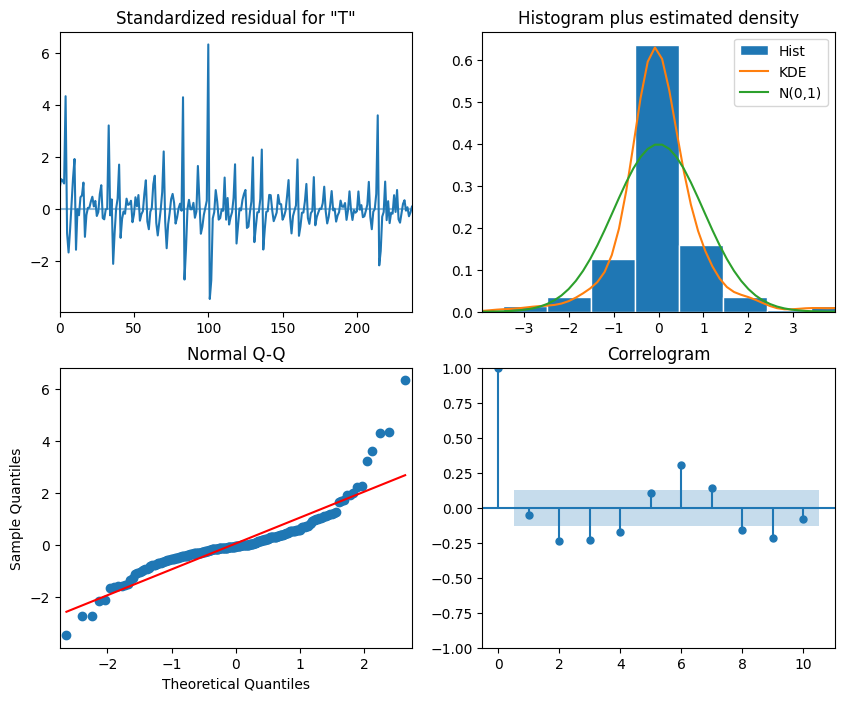

In [118]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['Total Revenue diff'], order=(2, 1, 2))
results = model.fit()

print(results.summary())

results.plot_diagnostics(figsize=(10, 8))
plt.show()

In [119]:
train_size = int(len(df) * 0.8)  # 80%
train_df = df[:train_size]
test_df = df[train_size:]

model = ARIMA(train_df['Total Revenue diff'], order=(2, 1, 2))
result = model.fit()

predictions = result.predict(start=len(train_df), end=len(df)-1, warn=False)

actual_values = test_df['Total Revenue diff']
mae = np.mean(np.abs(predictions - actual_values))
mse = np.mean((predictions - actual_values) ** 2)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 270.8069676339354
Mean Squared Error (MSE): 232739.67397898744
Root Mean Squared Error (RMSE): 482.4310043715966
